https://www.kaggle.com/code/raitest/us-airline-passenger-satisf-xgb-shap-optuna

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('../data/airline-passenger-satisfaction/train.csv')
test_df = pd.read_csv('../data/airline-passenger-satisfaction/test.csv')

In [3]:
train_df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


In [4]:
train_df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
all_features = train_df.columns.to_list()
all_features

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [7]:
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 
                'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
                'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
                'Inflight service', 'Cleanliness', 'satisfaction']

num_features = [f for f in all_features if f not in cat_features]

print("Numeric Features: ", num_features)

Numeric Features:  ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [8]:

train_df[num_features].describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.5,29994.6,0.0,25975.8,51951.5,77927.2,103903.0
id,103904.0,64924.2,37463.8,1.0,32533.8,64856.5,97368.2,129880.0
Age,103904.0,39.4,15.1,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.4,997.1,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.8,38.2,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.2,38.7,0.0,0.0,0.0,13.0,1584.0


In [9]:
train_df[['Unnamed: 0', 'id']].head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299


In [10]:
test_df[['Unnamed: 0', 'id']].head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,19556,90035,12360,77959,36875


In [11]:
# Drop unnamed and ID columns for both dataframes

train_df.drop(train_df.columns[0], axis=1, inplace=True)
test_df.drop(test_df.columns[0], axis=1, inplace=True)

train_df.drop(columns=['id'], errors='ignore', inplace=True)
test_df.drop(columns=['id'], errors='ignore', inplace=True)

In [12]:
train_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [13]:
test_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
# lets create satisfaction feature with summing up some assesments
train_df['sum_assessments'] = train_df['Inflight wifi service'] + train_df['Online boarding'] + train_df['Gate location'] + train_df['Baggage handling'] 
+ train_df['Checkin service'] + train_df['Seat comfort'] + train_df['Inflight service'] + train_df['Cleanliness']

0         19
1          7
2         18
3          9
4         14
          ..
103899     9
103900    19
103901    19
103902    11
103903     9
Length: 103904, dtype: int64

In [15]:
train_df.head().T

,0,1,2,3,4
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3
Gate location,1,3,2,5,3


In [16]:
test_df['sum_assessments'] = test_df['Inflight wifi service'] + test_df['Online boarding'] + test_df['Gate location'] + test_df['Baggage handling'] 
+ test_df['Checkin service'] + test_df['Seat comfort'] + test_df['Inflight service'] + test_df['Cleanliness']

0        15
1        17
2         8
3        12
4        12
         ..
25971    17
25972    18
25973    13
25974    17
25975     5
Length: 25976, dtype: int64

In [17]:
# lets create feature to calculate Delay changes during flight
train_df['Delay Change During Flight'] = train_df['Arrival Delay in Minutes'] - train_df['Departure Delay in Minutes']
test_df['Delay Change During Flight'] = test_df['Arrival Delay in Minutes'] - test_df['Departure Delay in Minutes']

In [18]:
train_df.head().T

,0,1,2,3,4
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3
Gate location,1,3,2,5,3


In [19]:
flight_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Delay Change During Flight']

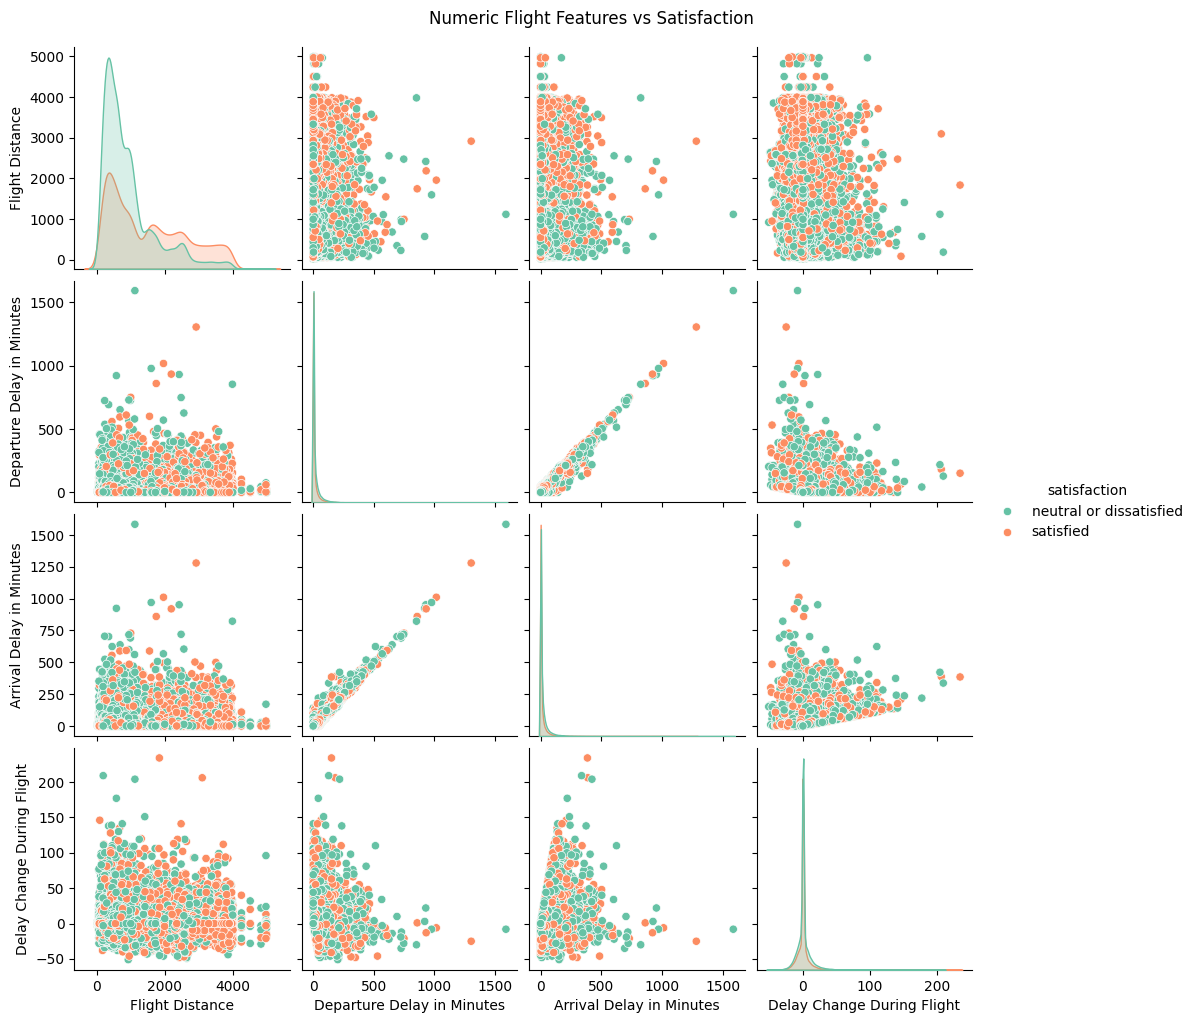

In [20]:
sns.pairplot(train_df[flight_features + ['satisfaction']], hue='satisfaction', diag_kind='kde', palette='Set2')
plt.suptitle("Numeric Flight Features vs Satisfaction", y=1.02)
plt.show()

In [26]:
import pandas as pd
import numpy as np
from scipy import stats

# Pearson and Spearman between two Series
r_pearson = train_df['Departure Delay in Minutes'].corr(train_df['Arrival Delay in Minutes'], method='pearson')
r_spearman = train_df['Departure Delay in Minutes'].corr(train_df['Arrival Delay in Minutes'], method='spearman')

# With p-values (Pearson)
r, p = stats.pearsonr(train_df['Departure Delay in Minutes'], train_df['Arrival Delay in Minutes'])

In [27]:
p

nan

In [28]:
r_pearson

0.9654809013755736

In [29]:
r

nan

In [30]:
r_spearman

0.7408426238339384

In [31]:
# Check for missing values in both columns
print("Departure Delay missing values:", train_df['Departure Delay in Minutes'].isnull().sum())
print("Arrival Delay missing values:", train_df['Arrival Delay in Minutes'].isnull().sum())

# Check total missing values
print("Total missing:", train_df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].isnull().sum().sum())

Departure Delay missing values: 0
Arrival Delay missing values: 310
Total missing: 310


In [34]:
# Remove rows with missing values in either column
clean_data = train_df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].dropna()

# Then calculate correlation
r, p = stats.pearsonr(clean_data['Departure Delay in Minutes'], clean_data['Arrival Delay in Minutes'])

In [35]:
r

0.9654809013755733

In [36]:
p

0.0

In [37]:

# Correlation matrix (Pearson by default)
features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Delay Change During Flight']
corr_mat = train_df[features].corr()


In [38]:
corr_mat

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Delay Change During Flight
Flight Distance,1.000000,0.002158,-0.002426,-0.016474
Departure Delay in Minutes,0.002158,1.000000,0.965481,-0.074583
Arrival Delay in Minutes,-0.002426,0.965481,1.000000,0.187740
Delay Change During Flight,-0.016474,-0.074583,0.187740,1.000000


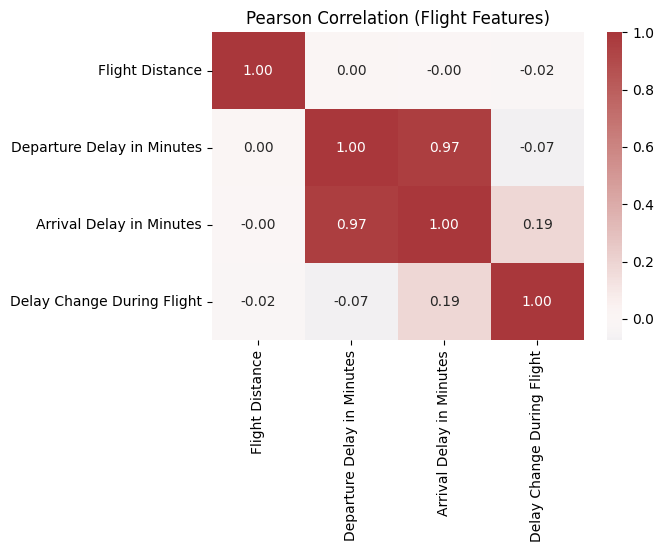

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Pearson Correlation (Flight Features)')
plt.show()

In [40]:

# Spearman matrix (more robust for skewed delays)
spearman_mat = train_df[features].corr(method='spearman')

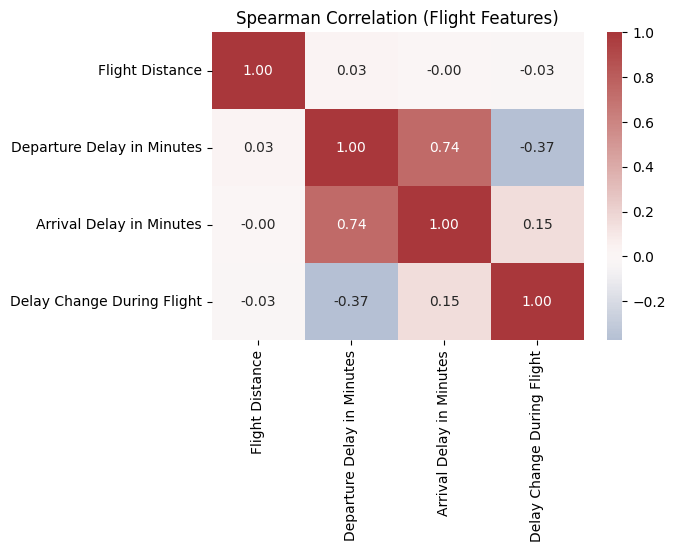

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(spearman_mat, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Spearman Correlation (Flight Features)')
plt.show()

In [42]:
# Categorical Features in Data
# print unique values for train_df[cat_features]
for col in cat_features:
    unique_vals = train_df[col].unique()
    print(f"{col}: {unique_vals}\n") 

Gender: ['Male' 'Female']

Customer Type: ['Loyal Customer' 'disloyal Customer']

Type of Travel: ['Personal Travel' 'Business travel']

Class: ['Eco Plus' 'Business' 'Eco']

Inflight wifi service: [3 2 4 1 5 0]

Departure/Arrival time convenient: [4 2 5 3 1 0]

Ease of Online booking: [3 2 5 4 1 0]

Gate location: [1 3 2 5 4 0]

Food and drink: [5 1 2 4 3 0]

Online boarding: [3 5 2 1 4 0]

Seat comfort: [5 1 2 3 4 0]

Inflight entertainment: [5 1 2 3 4 0]

On-board service: [4 1 2 3 5 0]

Leg room service: [3 5 4 2 1 0]

Baggage handling: [4 3 5 1 2]

Checkin service: [4 1 3 5 2 0]

Inflight service: [5 4 3 1 2 0]

Cleanliness: [5 1 2 3 4 0]

satisfaction: ['neutral or dissatisfied' 'satisfied']



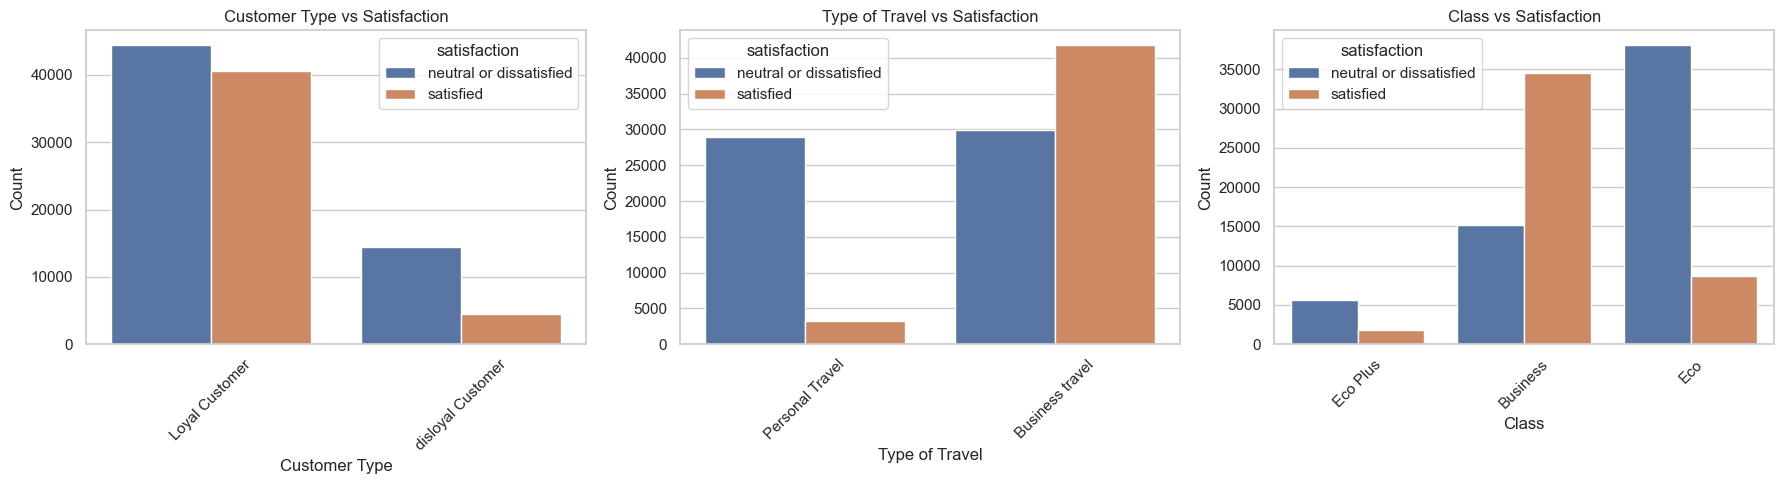

In [43]:
# Set plot style
sns.set_theme(style="whitegrid")

# Features to plot
features_to_plot = ['Customer Type', 'Type of Travel', 'Class']

# Create subplots
fig, axes = plt.subplots(1, len(features_to_plot), figsize=(18, 5))

# Loop through features and plot
for i, feature in enumerate(features_to_plot):
    sns.countplot(data=train_df, x=feature, hue='satisfaction', ax=axes[i])
    axes[i].set_title(f"{feature} vs Satisfaction")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

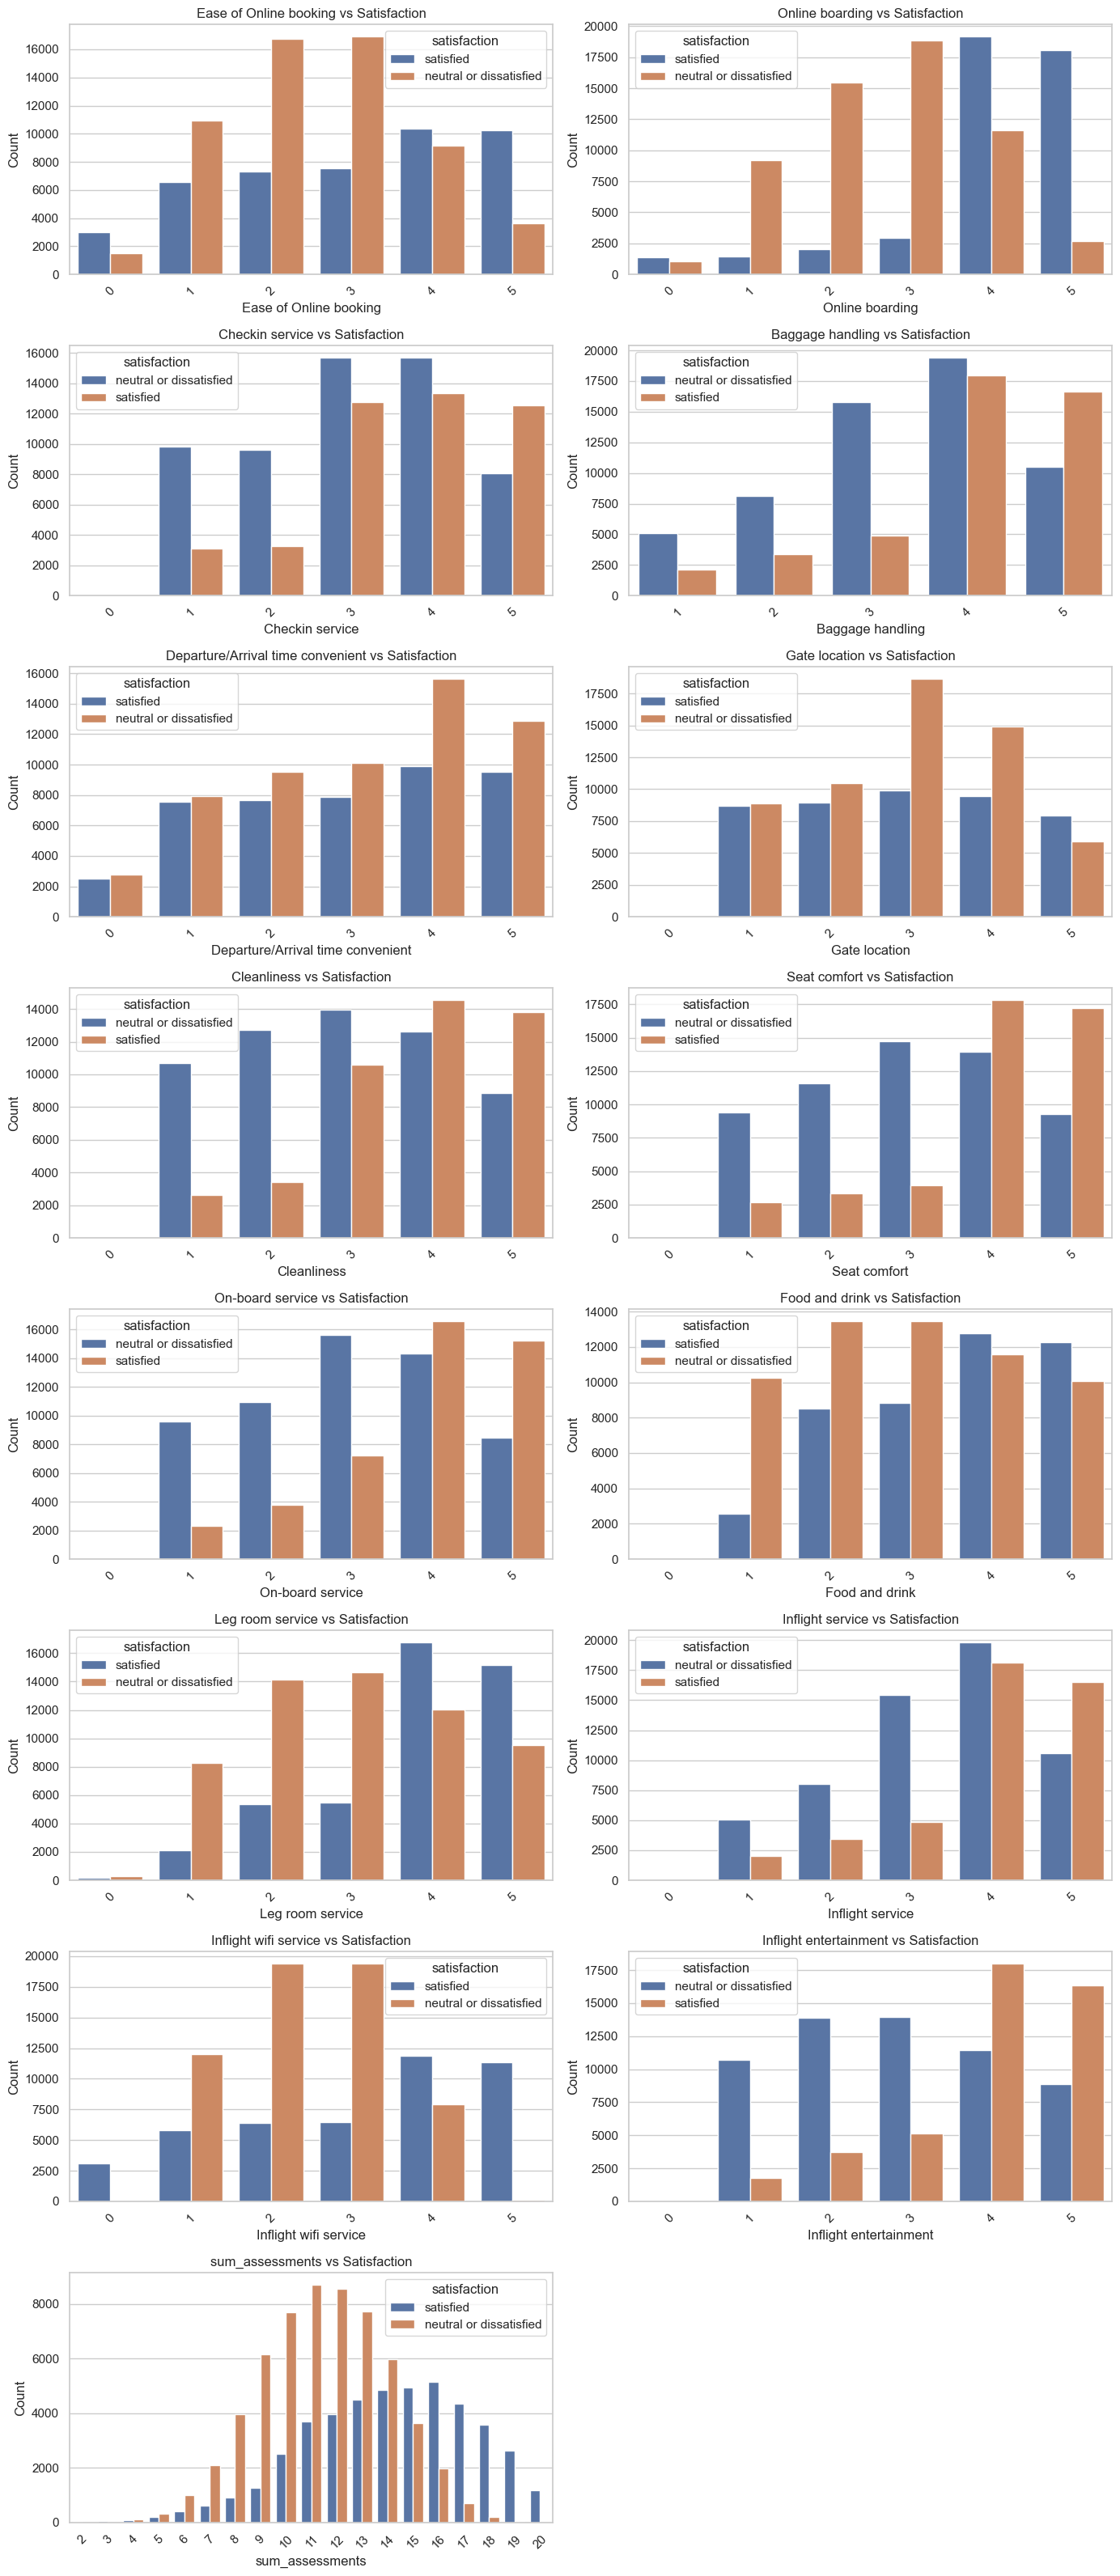

In [44]:
# Set plot style
sns.set_theme(style="whitegrid")

# Features to plot (14 items with values in scale 0..5)

features_to_plot = ['Ease of Online booking', 'Online boarding', 'Checkin service', 'Baggage handling', 
                    'Departure/Arrival time convenient', 'Gate location', 'Cleanliness', 'Seat comfort',
                    'On-board service', 'Food and drink', 'Leg room service', 'Inflight service',    
                    'Inflight wifi service', 'Inflight entertainment', 'sum_assessments']

# Define subplot grid: 2 columns, calculate rows
n_cols = 2
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Loop through features and plot
for i, feature in enumerate(features_to_plot):
    sns.countplot(data=train_df, x=feature, hue='satisfaction', ax=axes[i])
    axes[i].set_title(f"{feature} vs Satisfaction")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

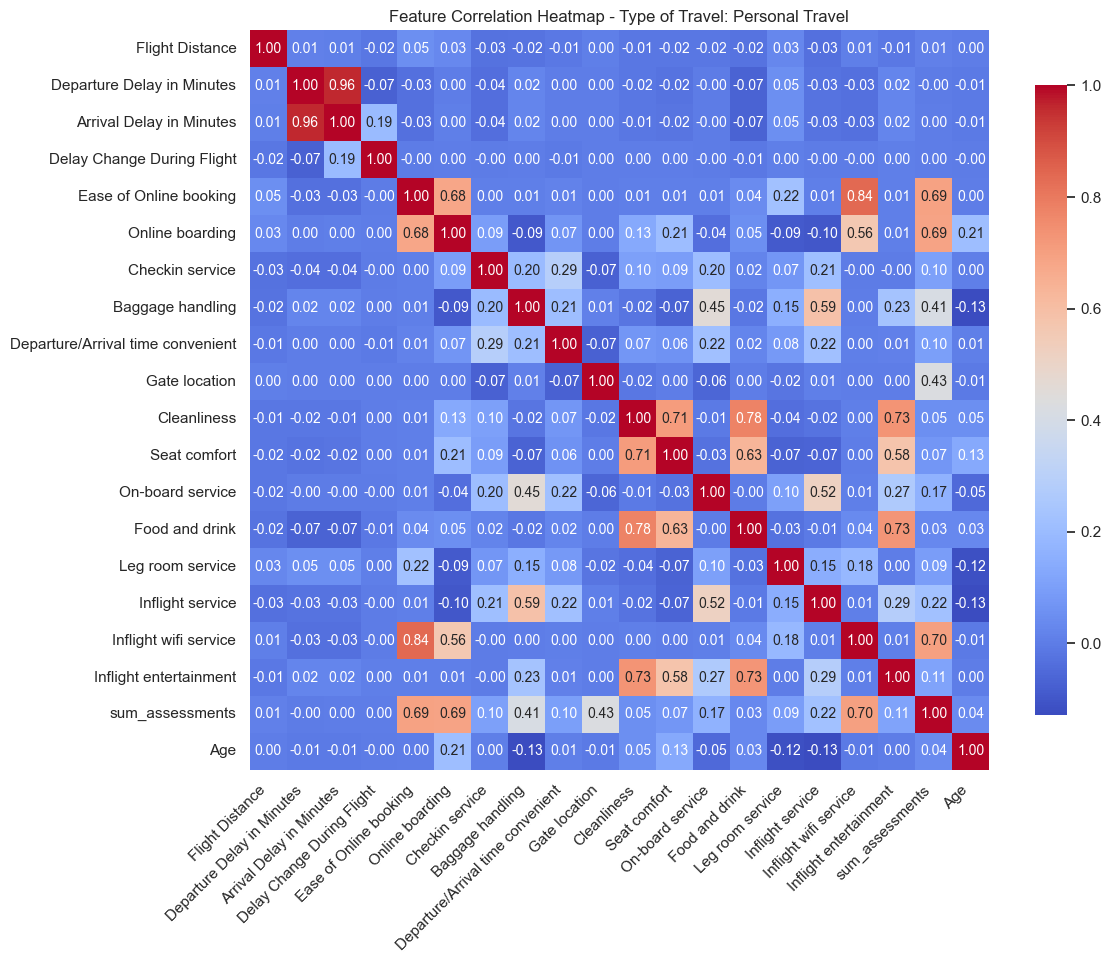

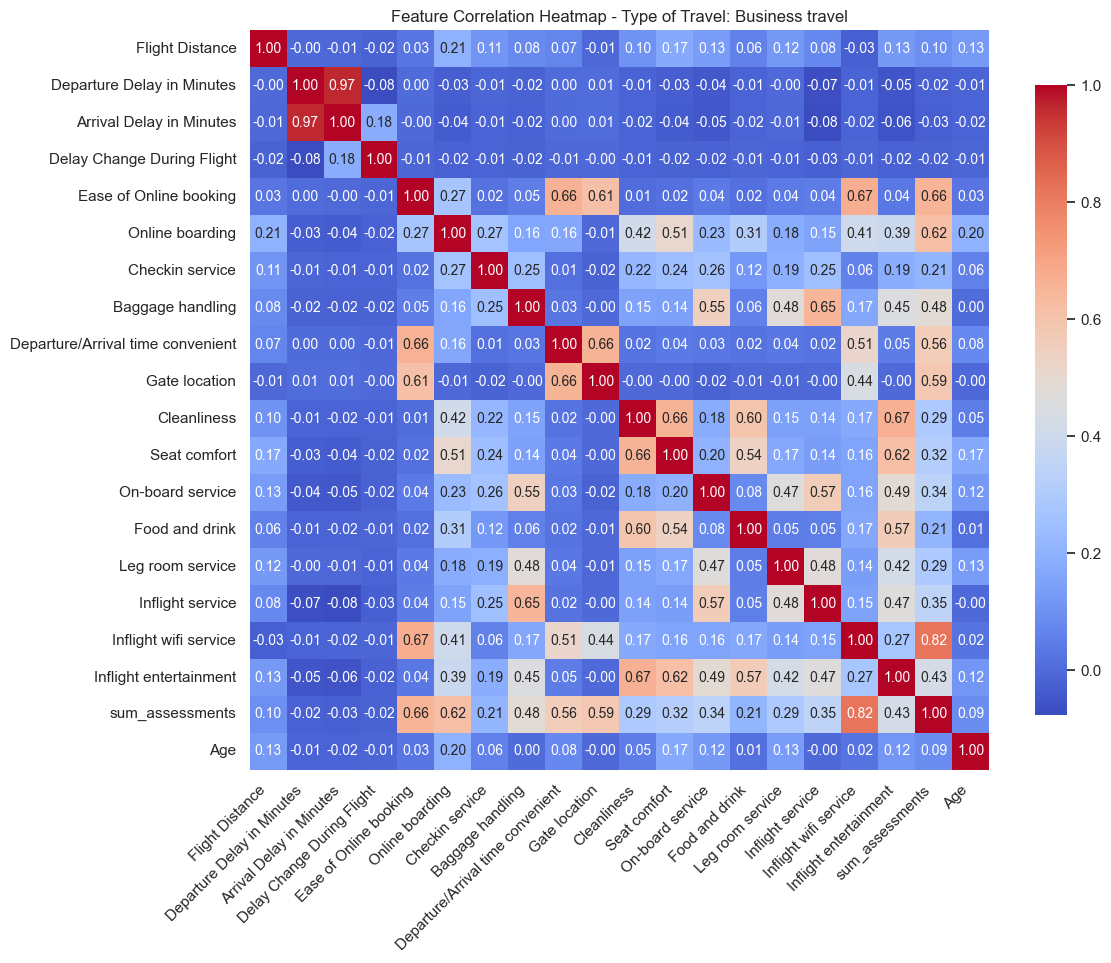

In [45]:
# create separate heatmaps for 'Type of Travel' values for covering flight_features and features_to_plot 

# Combine all Numeric features
all_features = flight_features + features_to_plot + ['Age']

# Get unique travel types
travel_types = train_df['Type of Travel'].unique()

# Create heatmaps for each travel type
for travel_type in travel_types:
    subset = train_df[train_df['Type of Travel'] == travel_type]
    
    # Compute correlation matrix
    corr = subset[all_features].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
    plt.title(f"Feature Correlation Heatmap - Type of Travel: {travel_type}")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

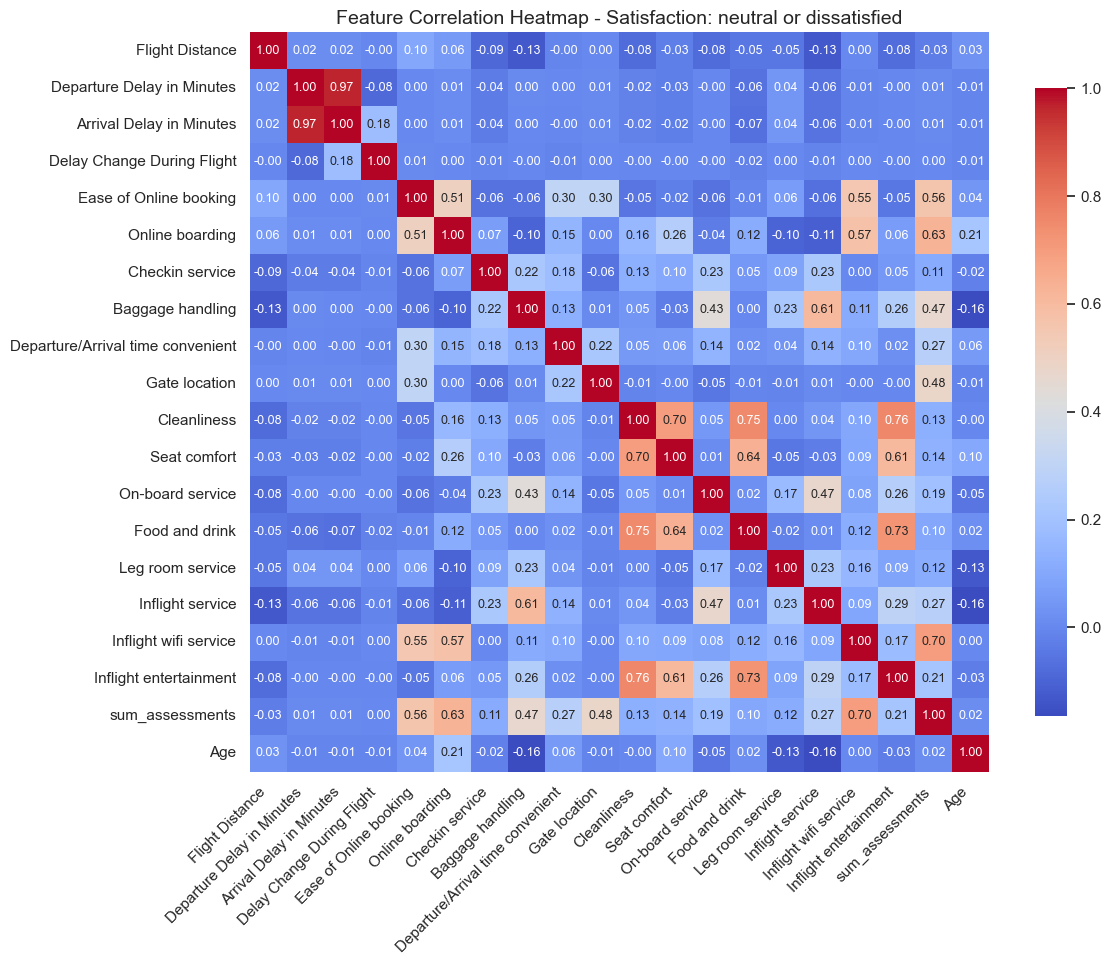

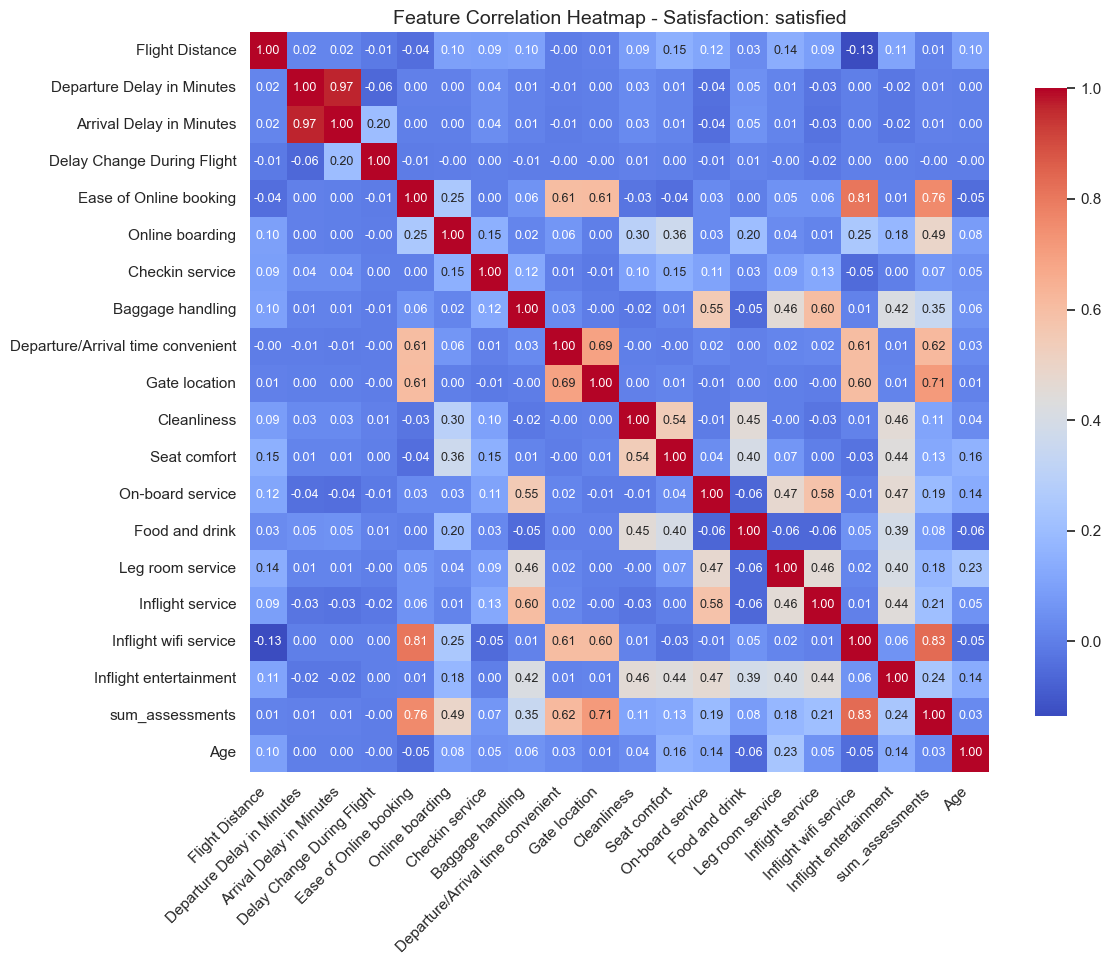

In [46]:
# Get unique satisfaction levels
satisfaction_levels = train_df['satisfaction'].unique()

# Create heatmaps for each satisfaction level
for level in satisfaction_levels:
    subset = train_df[train_df['satisfaction'] == level]
    
    # Compute correlation matrix
    corr = subset[all_features].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, 
                annot_kws={"size": 9}, cbar_kws={"shrink": 0.8})
    
    plt.title(f"Feature Correlation Heatmap - Satisfaction: {level}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb

# Encode target
label_map = {'satisfied': 1, 'neutral or dissatisfied': 0}
train_df['satisfaction'] = train_df['satisfaction'].map(label_map)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [51]:
# Dropping the rows with NaNs for XGBoost processing
train_df = train_df.dropna()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594 no